# Task lab work # 4
# First Name, Last Name
# Group No

### The task contains 2 parts:
1. Play with [Tensorflow Playground](https://playground.tensorflow.org) and save a bunch of screenshots (at least 10).
2. Solve the classification problem on your dataset from the Lab #2: play with number of neurons, function activation and learning rate (and if you wish play with learning rate schedule)

### Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)


Play with [Tensorflow Playground](https://playground.tensorflow.org):

![img](./img/1.png)
![img](./img/2.png)
![img](./img/3.png)
![img](./img/4.png)
![img](./img/5.png)
![img](./img/6.png)
![img](./img/7.png)
![img](./img/8.png)
![img](./img/9.png)
![img](./img/10.png)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [8]:
df = pd.read_csv('happydata.csv')

# Separate features and target
# Assume last column is target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

seed = 123

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
													y,
													test_size=0.3,
													random_state=seed)

# 2. Define function to create model with varying parameters
def create_model(neurons=16, activation='relu', learning_rate=0.001):
	model = Sequential()
	model.add(Input(shape=(X_train.shape[1],)))
	model.add(Dense(neurons, activation=activation))
	model.add(Dense(neurons, activation=activation))
	model.add(Dense(1, activation='sigmoid'))  # Binary classification

	optimizer = Adam(learning_rate=learning_rate)
	model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# Configurations to try
configs = [
	{'neurons': 8, 'activation': 'relu', 'lr': 0.01},
	{'neurons': 16, 'activation': 'tanh', 'lr': 0.001},
	{'neurons': 32, 'activation': 'relu', 'lr': 0.0005},
	{'neurons': 64, 'activation': 'sigmoid', 'lr': 0.001},
]

In [9]:
# Store results
results = []
history_dicts = []

# Train and evaluate models
for config in configs:
	model = create_model(neurons=config['neurons'], activation=config['activation'], learning_rate=config['lr'])
	history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_split=0.2)
	
	# Evaluate
	loss, acc = model.evaluate(X_test, y_test, verbose=0)
	y_pred = (model.predict(X_test) > 0.5).astype(int)
	report = classification_report(y_test, y_pred, output_dict=True)

	# Store results
	results.append({
		'Neurons': config['neurons'],
		'Activation': config['activation'],
		'Learning Rate': config['lr'],
		'Test Accuracy': acc,
		'Precision': report['1']['precision'],
		'Recall': report['1']['recall'],
		'F1 Score': report['1']['f1-score']
	})
	history_dicts.append((config, history))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


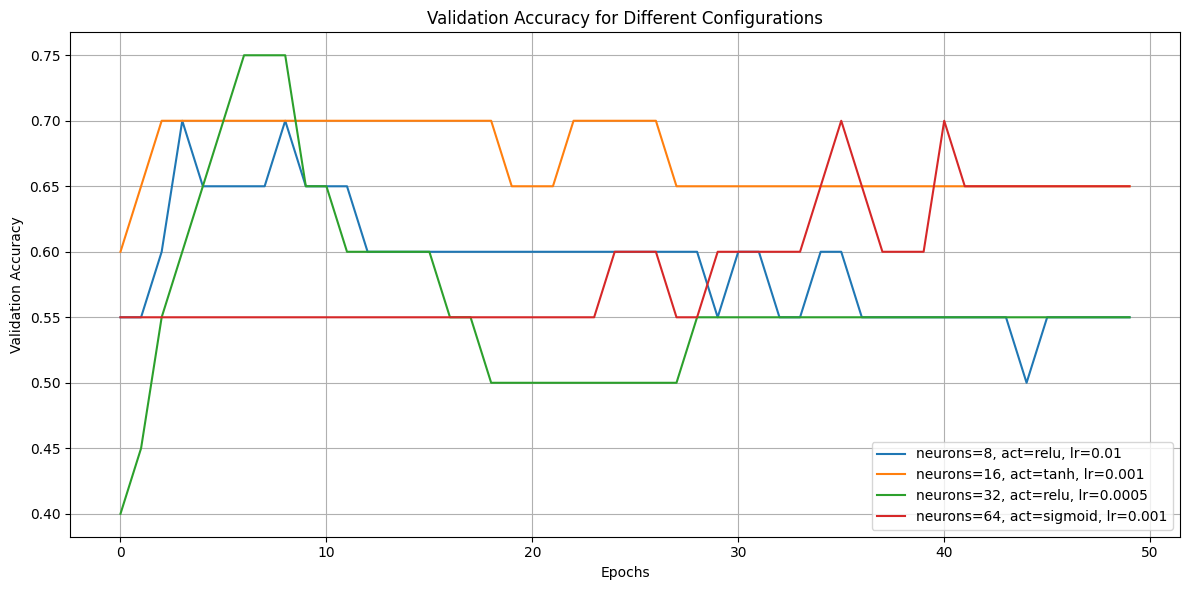

,Neurons,Activation,Learning Rate,Test Accuracy,Precision,Recall,F1 Score
0,32,relu,0.0005,0.488372,0.419355,0.764706,0.541667
1,64,sigmoid,0.0010,0.441860,0.405405,0.882353,0.555556
2,8,relu,0.0100,0.418605,0.382353,0.764706,0.509804
3,16,tanh,0.0010,0.418605,0.388889,0.823529,0.528302


In [10]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot combined training history
plt.figure(figsize=(12, 6))
for config, history in history_dicts:
	label = f"neurons={config['neurons']}, act={config['activation']}, lr={config['lr']}"
	plt.plot(history.history['val_accuracy'], label=label)

plt.title("Validation Accuracy for Different Configurations")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)


### **Conclusions**.

In the experiment, we investigated the effect of the number of neurons, activation functions and training speed on the efficiency of a neural network for classifying data from the `happydata.csv' dataset. Four different model configurations were tested.

1. **The highest accuracy on the test set (Test Accuracy = 0.488)** was shown by the model with:

   * **32 neurons**,
   * ReLU activation,
   * Learning rate 0.0005**.
     This model has achieved a good balance between accuracy and completeness, although the metric values remain low.

2. **The highest F1-score (0.555)** was demonstrated by the model with:

   * **64 neurons**,
   * **sigmoid activation**,
   * learning rate of 0.001**.
     The high recall value (0.88) indicates the model's ability to find positive cases well, but the reduced accuracy (0.41) indicates a large number of false positives.

3. Models with a smaller number of neurons (8 or 16) showed **worse results in terms of accuracy**, although one of them (16/tanh/0.001) achieved an acceptable **F1-rate of 0.528**.

4. Overall, the results show that:

   * **The number of neurons** has a significant impact on the quality of the model: more neurons lead to better results.
   * The sigmoid activation function can provide higher completeness, but often at the expense of accuracy.
   * A lower learning rate (0.0005-0.001) works better for more complex models.